# Initialization
Import modules and define useful plotting functions

In [1]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import integrate
import glob,sys

from mpl_toolkits.basemap import Basemap, shiftgrid

import MV2 as MV
import cdms2 as cdms
import genutil
import cdutil
import cdtime

sys.path.append("/Users/kmarvel/Google Drive/python-utils")
import Plotting


def bmap(X,projection="moll",**kwargs):
    """ quick plot of data on a lat,lon grid """
   # lon = X.getLongitude()[:]
    #lat = X.getLatitude()[:]
    
    lon = X.getLongitude().getBounds()[:,0]
    lat = X.getLatitude().getBounds()[:,0]
    vmin=None
    vmax=None
    if "vmin" in kwargs.keys():
        vmin=kwargs.pop("vmin")
    if "vmax" in kwargs.keys():
        vmax=kwargs.pop("vmax")
    if not ("lon_0" in list(kwargs.keys())):
        lon_0=np.median(lon)
    else:
        lon_0=kwargs.pop("lon_0")
        X,lon = shiftgrid(180,X,lon,start=False)
    m = Basemap(lon_0=lon_0,projection=projection,**kwargs)
    
        
    x,y=m(*np.meshgrid(lon,lat))
    #if vmin is None:
    #m.pcolormesh(x,y,X,**kwargs)
    #else:
    m.pcolor(x,y,X,vmin=vmin,vmax=vmax)
    return m

surface = {"hfls": "Surface Upward Latent Heat Flux",\
            "hfss": "Surface Upward Sensible Heat Flux",\
            "rlds":"Surface Downwelling Longwave Radiation",\
            "rlus":"Surface Upwelling Longwave Radiation",\
            "rsds":"Surface Downwelling Shortwave Radiation",\
            "rsus": "Surface Upwelling Shortwave Radiation"}
TOA = {"rsdt":"TOA Incident Shortwave Radiation",\
       "rsut": "TOA Outgoing Shortwave Radiation",\
       "rlut": "TOA Outgoing Longwave Radiation"}

# Data entry from RFMIP LGM experiments

In [76]:
datadirec="/Users/kmarvel/Documents/DATA/LGM/LGM-Adjustments/ipsl-glac1d/"
#datadirec="/Users/kmarvel/Documents/DATA/LGM/LGM-Adjustments/ipsl-ice6g/"

## Top-of-atmosphere variables

In [90]:
f=cdms.open(glob.glob(datadirec+"rsdt_*")[0])

rsdt=f("rsdt")

f.close()

f=cdms.open(glob.glob(datadirec+"rsut_*")[0])

rsut=f("rsut")

f.close()

f=cdms.open(glob.glob(datadirec+"rlut_*")[0])

rlut=f("rlut")

f.close()

TOA = rsdt-(rsut+rlut)

print("TOA imbalance is ", MV.average(cdutil.averager(TOA,axis='xy')))

f=cdms.open(glob.glob(datadirec+"ts_*")[0])

ts=f("ts")

f.close()

TOA imbalance is  -2.9278632608819906


## Clear-sky fluxes

In [78]:
#f=cdms.open(glob.glob(datadirec+"rsdtcs_*")[0])

#rsdtcs=f("rsdtcs")

#f.close()

f=cdms.open(glob.glob(datadirec+"rsutcs_*")[0])

rsutcs=f("rsutcs")

f.close()

f=cdms.open(glob.glob(datadirec+"rlutcs_*")[0])

rlutcs=f("rlutcs")

f.close()



In [79]:
SWCRE = rsutcs-rsut
LWCRE = rlutcs-rlut

## Cloud cover

In [83]:
f=cdms.open(glob.glob(datadirec+"clt_*")[0])

clt=f("clt")

f.close()

f=cdms.open(glob.glob(datadirec+"clcalipso_*")[0])

clcalipso=f("clcalipso")
#clisccp=f("clisccp")

f.close()

Sanity check: does the cloud cover look ok?

<IPython.core.display.Javascript object>


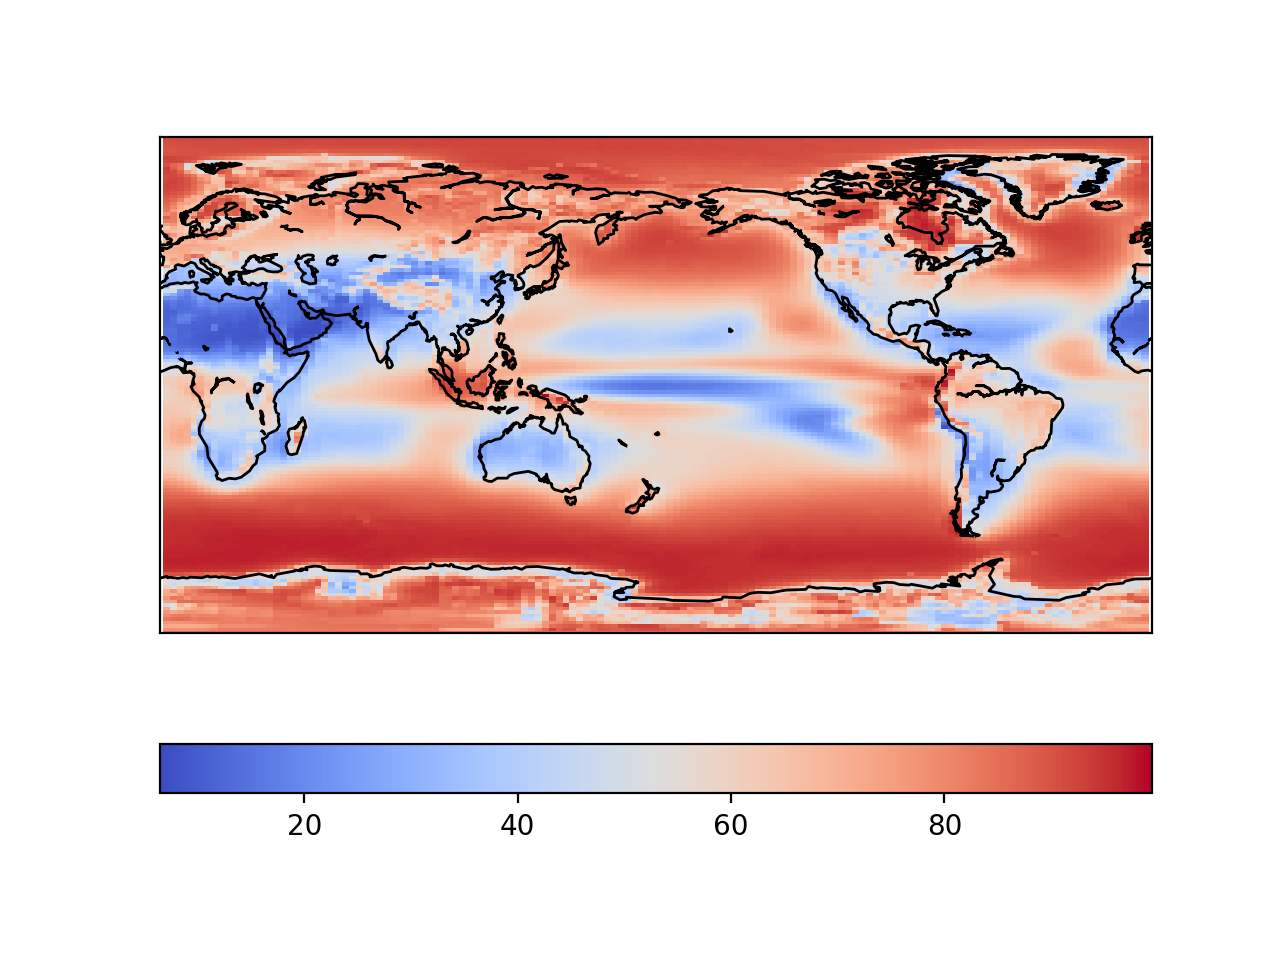

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [85]:
plt.set_cmap(cm.magma)
plt.figure()
m=bmap(MV.average(clt,axis=0),projection="cyl")
m.drawcoastlines()
cbar=plt.colorbar(orientation="horizontal")

<IPython.core.display.Javascript object>


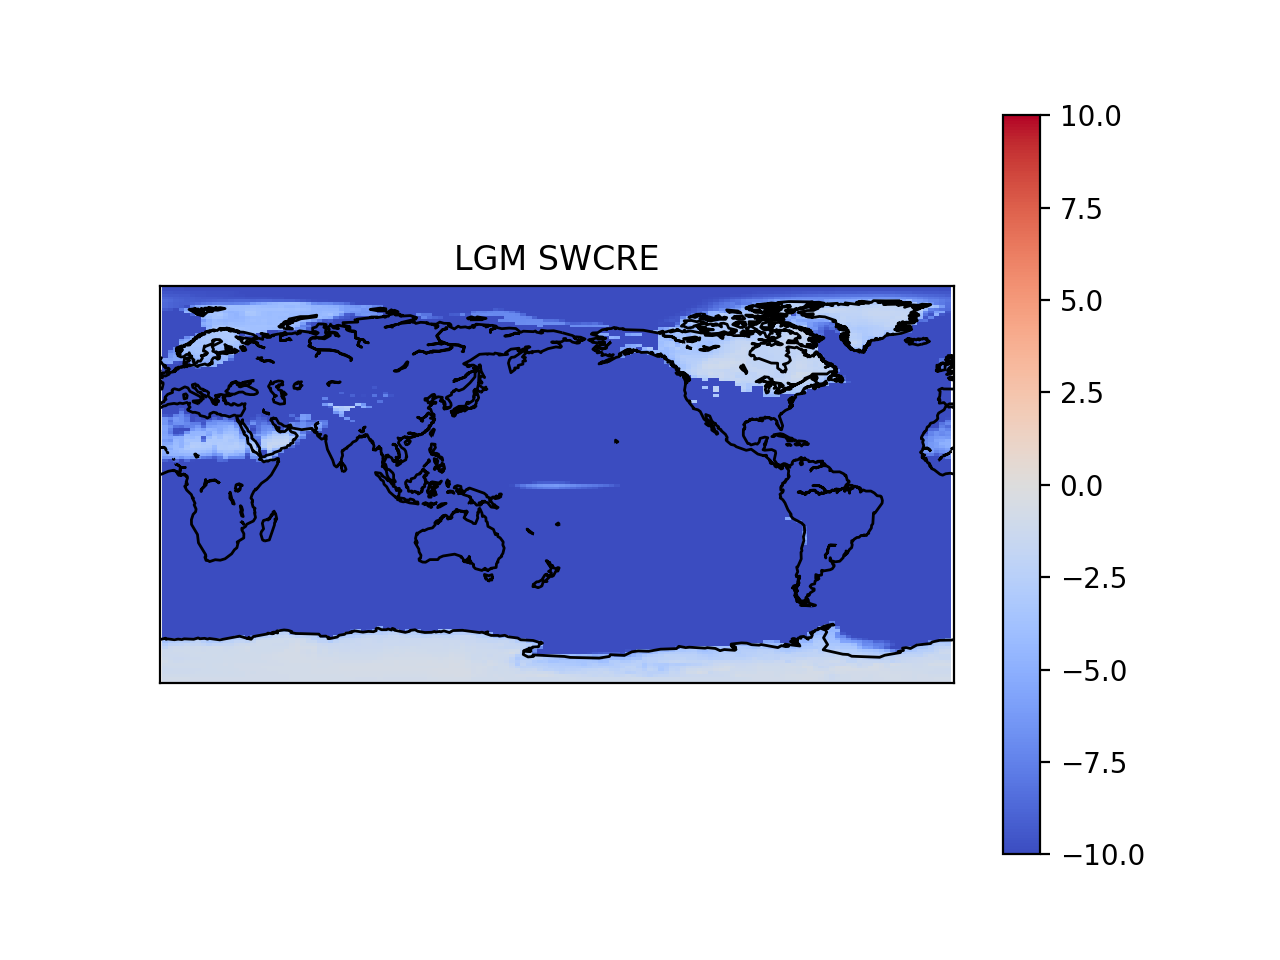

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [91]:
plt.set_cmap(cm.coolwarm)
plt.figure()
m=bmap(MV.average(SWCRE,axis=0),projection="cyl",vmin=-10,vmax=10)
plt.title("LGM SWCRE")
m.drawcoastlines()
cbar=plt.colorbar()

<IPython.core.display.Javascript object>


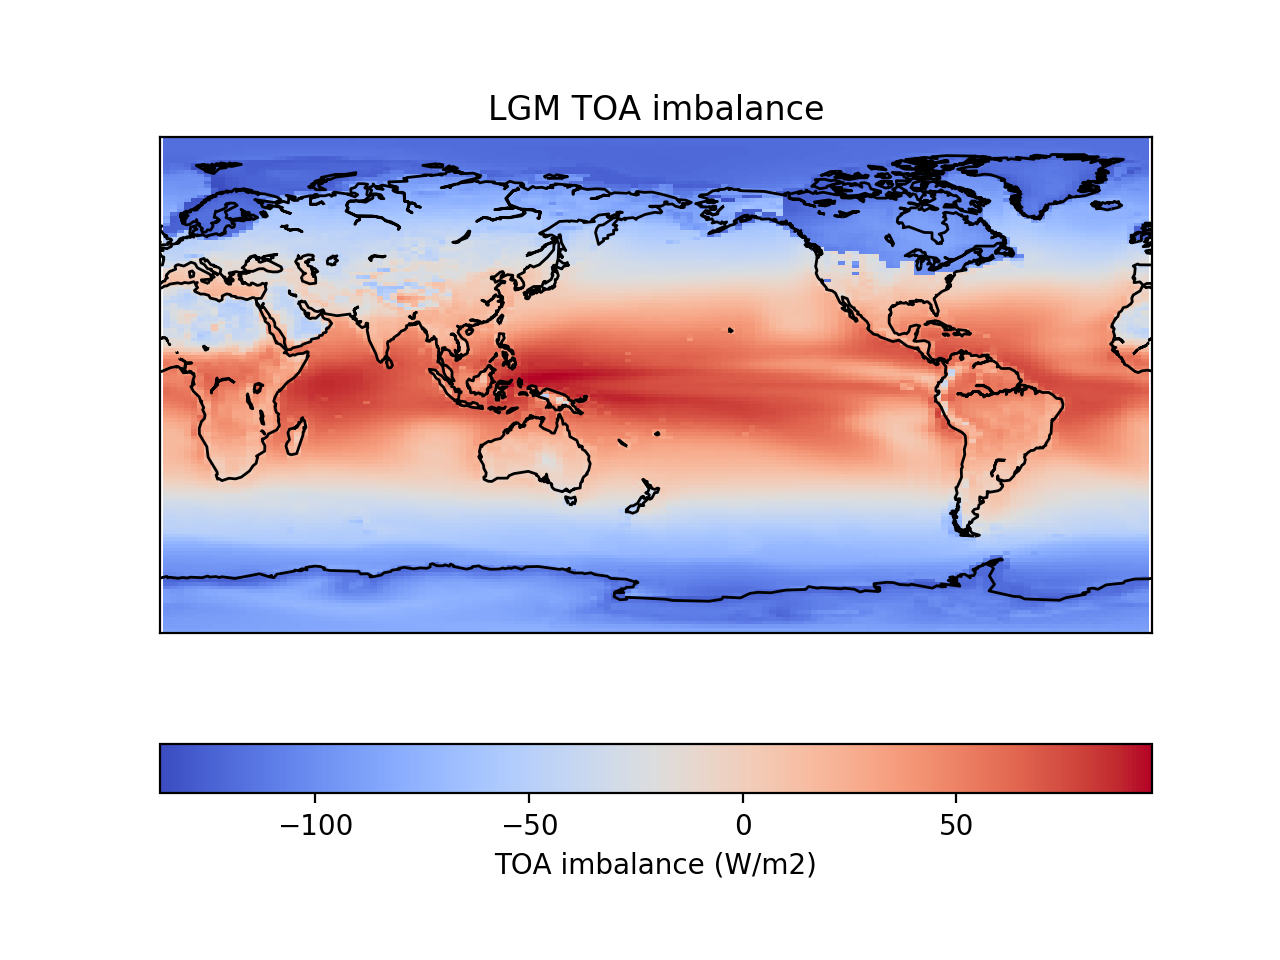

In [92]:
plt.figure()
plt.set_cmap(cm.coolwarm)
plt.title("LGM TOA imbalance")
m=Plotting.bmap(MV.average(TOA,axis=0),projection="cyl")
m.drawcoastlines()
cbar=plt.colorbar(orientation='horizontal',label="TOA imbalance (W/m2)")


## Preindustrial control data

In [57]:
pidirec="/Users/kmarvel/Documents/DATA/LGM/IPSL_preindustrial/TimeMeans/"
rsdt_mean=MV.average(rsdt,axis=0)
frsut=cdms.open(pidirec+"rsut_timemean.nc")
rsut_pi=frsut("rsut")
frsut.close()
frlut=cdms.open(pidirec+"rlut_timemean.nc")
rlut_pi=frlut("rlut")
frlut.close()

frsutcs=cdms.open(pidirec+"rsutcs_timemean.nc")
rsutcs_pi=frsutcs("rsutcs")
frsutcs.close()

frlutcs=cdms.open(pidirec+"rlutcs_timemean.nc")
rlutcs_pi=frlutcs("rlutcs")
frlutcs.close()

fts=cdms.open(pidirec+"ts_timemean.nc")
ts_pi=fts("ts")
fts.close()

In [93]:
TOA_LGM=MV.average(TOA,axis=0)
TOA_pi = rsdt_mean-(rsut_pi+rlut_pi)

## TOA imbalance in the pre-industrial runs (why is it nonzero?)

In [98]:
print("TOA imbalance is", float(cdutil.averager(TOA_pi,axis='xy')), "Wm-2")

TOA imbalance is 0.6770084782368172 Wm-2


## Flux differences and cloud radiative effects
Huge reductions over the ice sheets, as expected.  

<IPython.core.display.Javascript object>


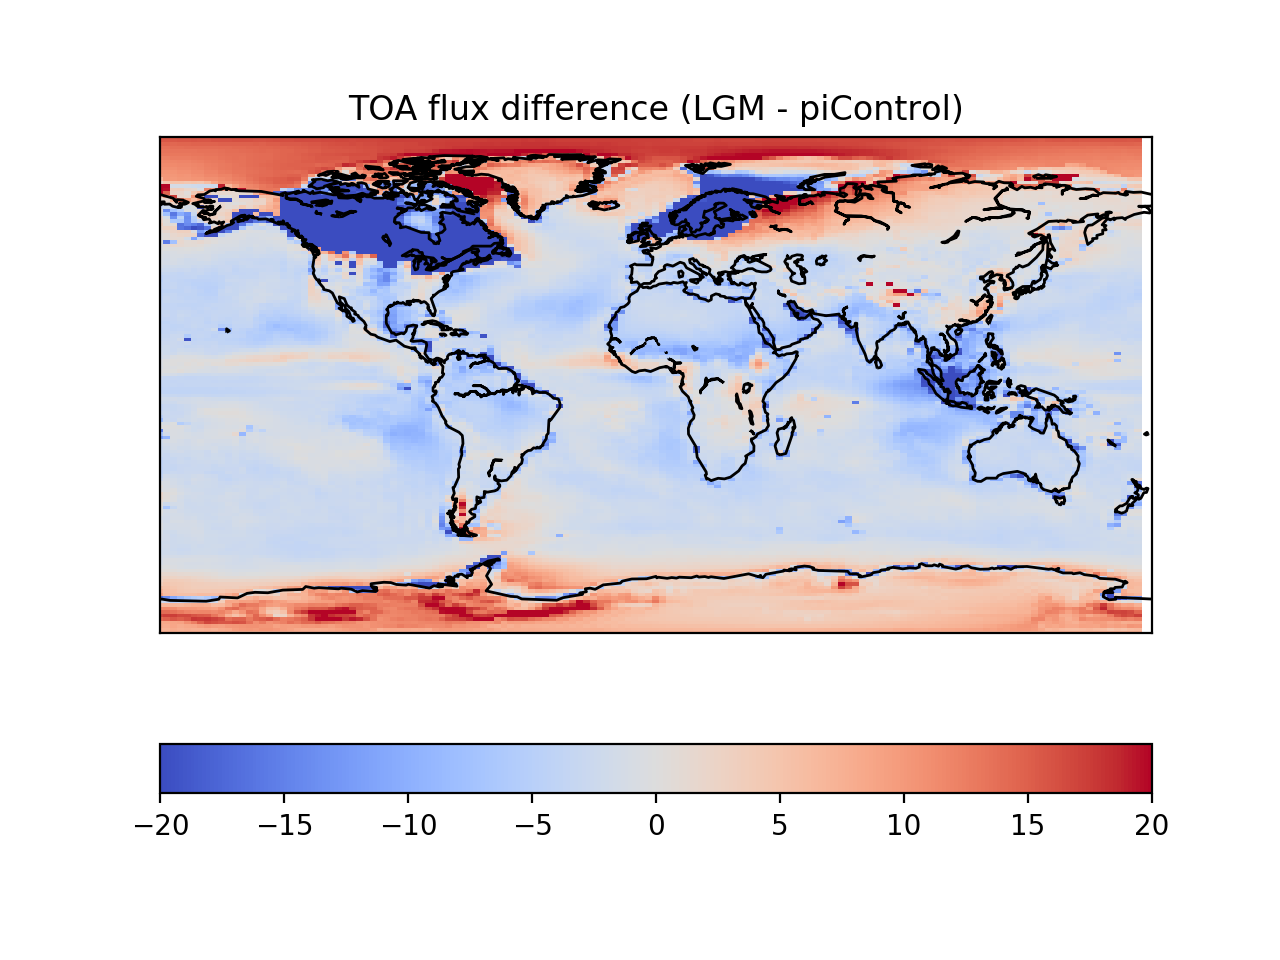

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [102]:
plt.figure()
m=bmap(MV.average(TOA,axis=0)-TOA_pi,projection="cyl",vmin=-20,vmax=20,lon_0=0)
plt.colorbar(orientation="horizontal")
plt.title("TOA flux difference (LGM - piControl)")
m.drawcoastlines()

<IPython.core.display.Javascript object>


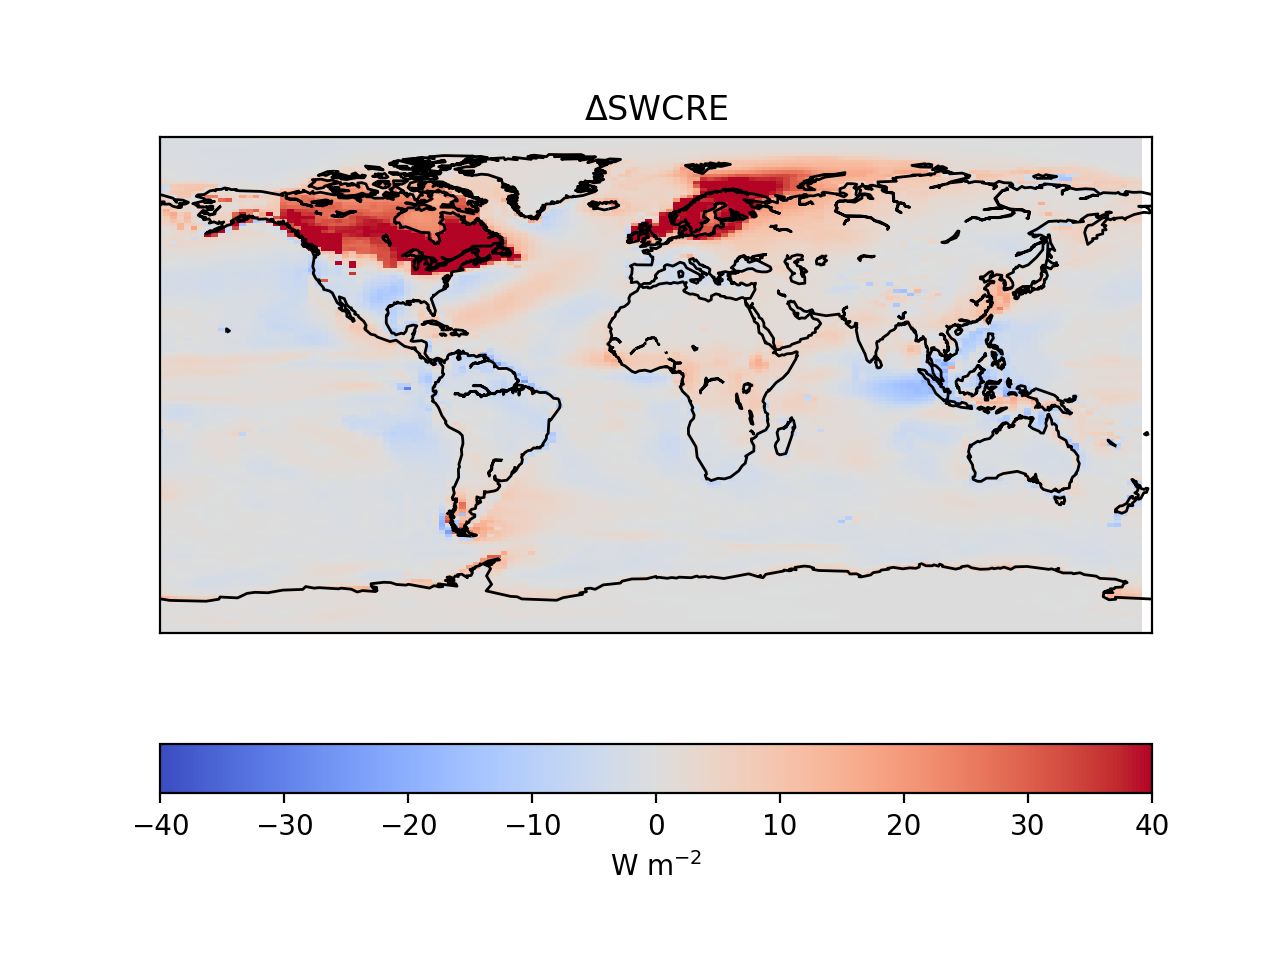

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(0.5, 1.0, '$\\Delta$SWCRE')

In [106]:
SWCRE_LGM=MV.average(SWCRE,axis=0)
SWCRE_piC=rsutcs_pi-rsut_pi
plt.figure()
m=bmap(SWCRE_LGM-SWCRE_piC,projection="cyl",vmin=-40,vmax=40,lon_0=0)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"W m$^{-2}$")
plt.title(r'$\Delta$SWCRE')

<IPython.core.display.Javascript object>


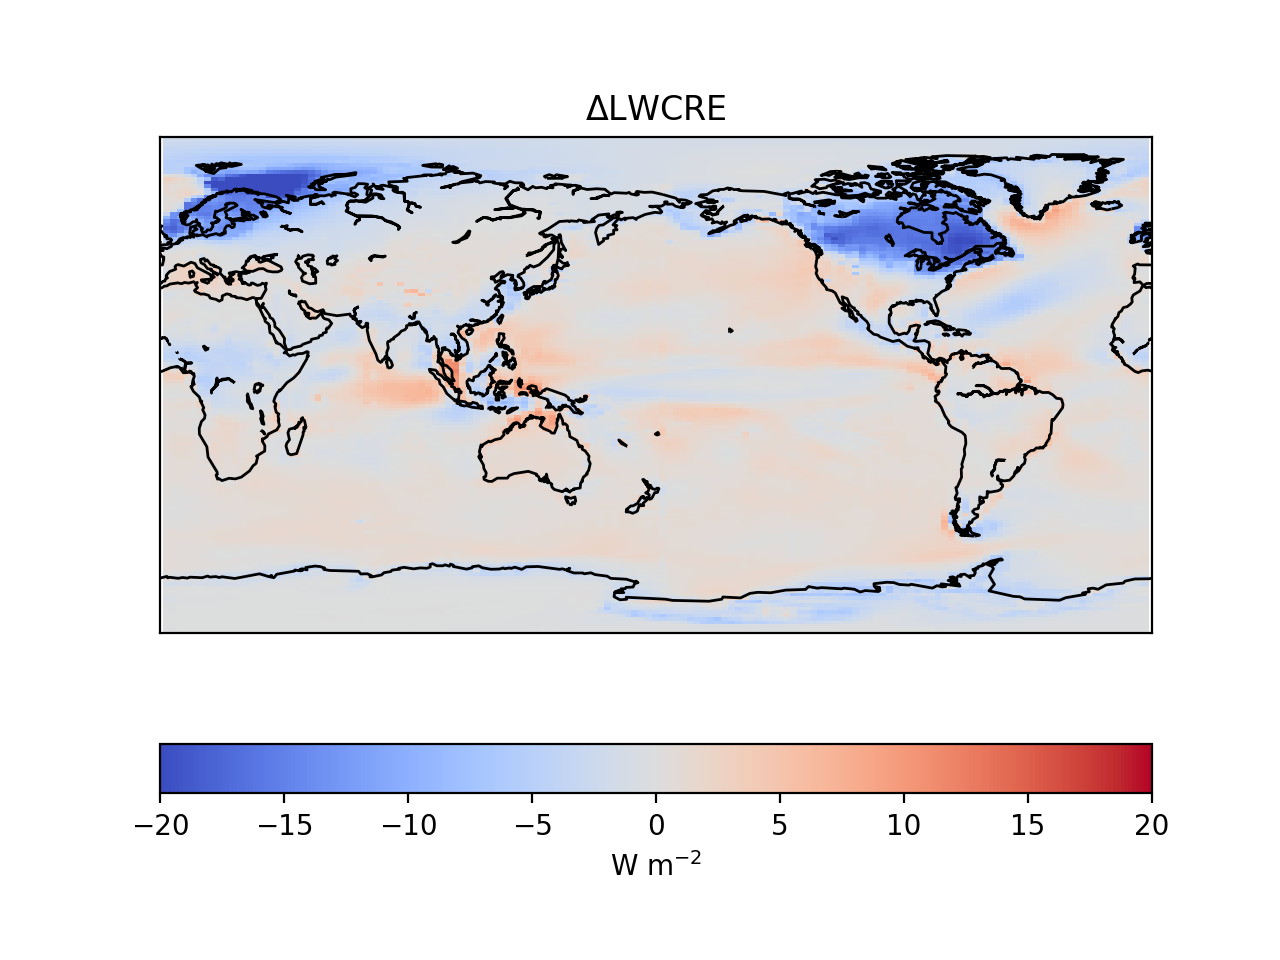

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [110]:
LWCRE_LGM=MV.average(LWCRE,axis=0)
LWCRE_piC=rlutcs_pi-rlut_pi
plt.figure()
m=bmap(LWCRE_LGM-LWCRE_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
cbar=plt.colorbar(orientation="horizontal",label=r"W m$^{-2}$")
title=plt.title(r'$\Delta$LWCRE')

In [51]:
print("LGM SWCRE is ",cdutil.averager(SWCRE_LGM,axis='xy'))
print("piC SWCRE is ", cdutil.averager(SWCRE_piC,axis='xy'))
print("DIFF is", cdutil.averager(SWCRE_LGM,axis='xy')-cdutil.averager(SWCRE_piC,axis='xy'))

LGM SWCRE is  -47.40987566334179
piC SWCRE is  -49.24807478976397
DIFF is 1.8381991264221753


In [56]:
print("LGM LWCRE is ",cdutil.averager(LWCRE_LGM,axis='xy'))
print("piC LWCRE is ", cdutil.averager(LWCRE_piC,axis='xy'))
print("DIFF is", cdutil.averager(LWCRE_LGM,axis='xy')-cdutil.averager(LWCRE_piC,axis='xy'))

LGM LWCRE is  25.659177447686663
piC LWCRE is  25.90206852747305
DIFF is -0.24289107978638924


<IPython.core.display.Javascript object>


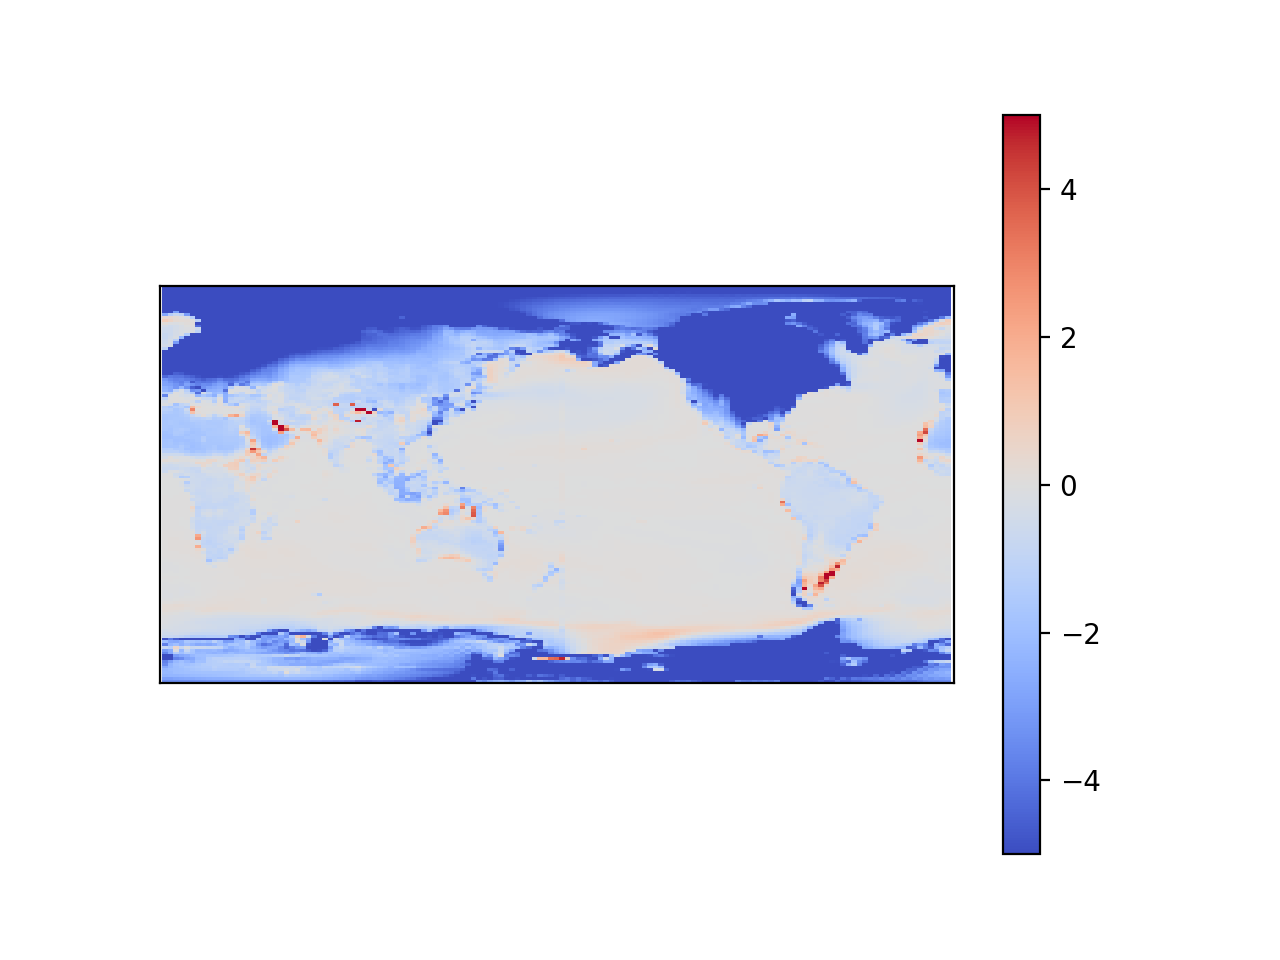

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [108]:
ts_LGM=MV.average(ts,axis=0)
dTs=ts_LGM-ts_pi
plt.figure()
bmap(dTs,projection='cyl',vmin=-5,vmax=5)
plt.colorbar()

In [112]:
print("Land cooling is",float(cdutil.averager(dTs,axis='xy')),"K")

Land cooling is -1.642240165768314 K


<IPython.core.display.Javascript object>


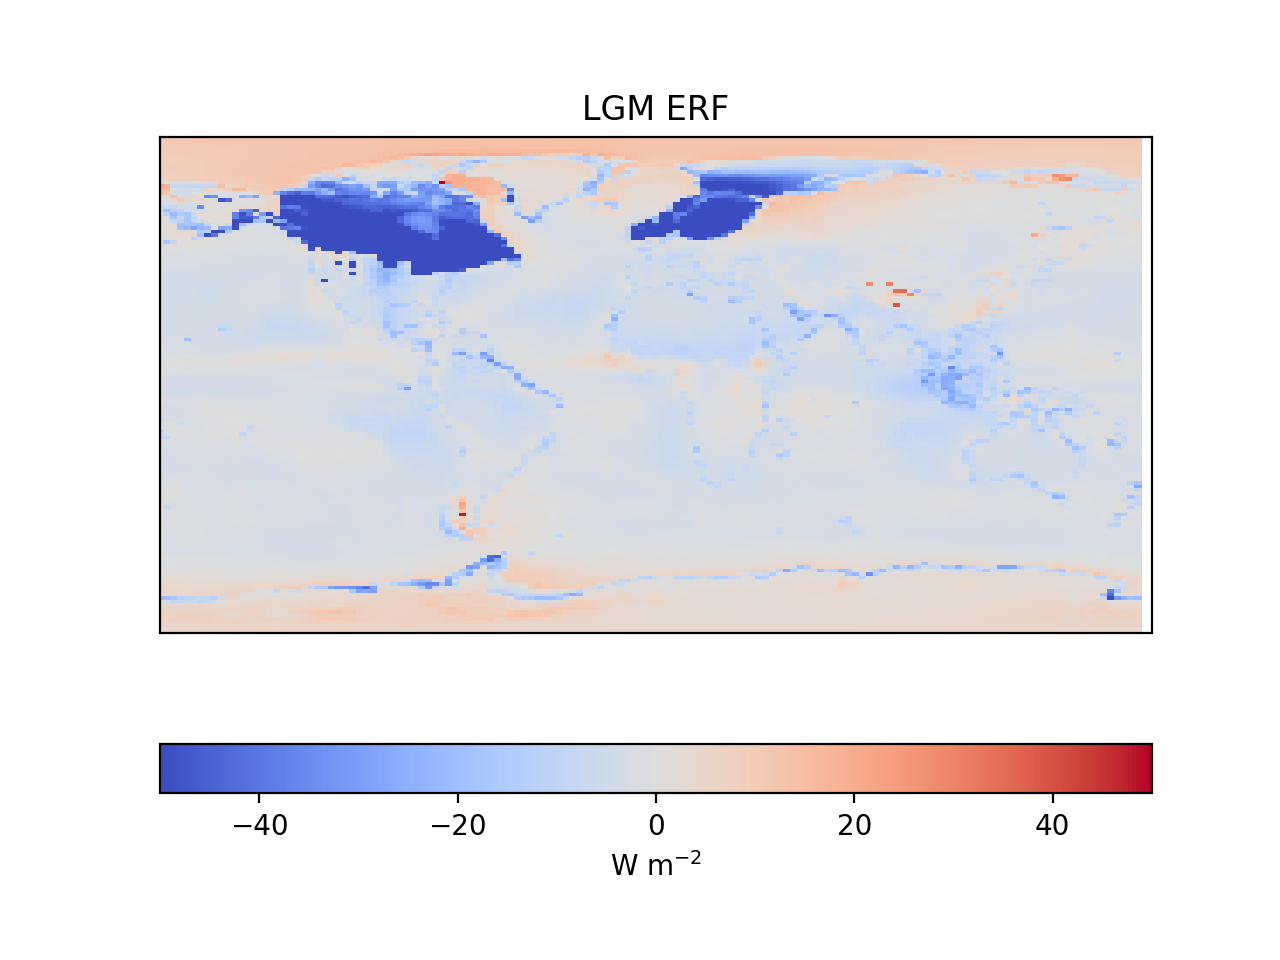

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [117]:
ERF_LGM = TOA_LGM-TOA_pi+dTs*0.75
plt.figure()
m=bmap(ERF_LGM,projection="cyl",lon_0=0,vmin=-50,vmax=50)
cbar=plt.colorbar(orientation="horizontal",label=r"W m$^{-2}$")
title=plt.title("LGM ERF")

In [118]:
print("ERF of the LGM is",cdutil.averager(ERF_LGM,axis='xy'),"Wm-2")

ERF of the LGM is -4.836551946728281 Wm-2


/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


Cooling in IPSL_CM5 (from ftp://oceane.obs-vlfr.fr/pub/lguidi/PRIME/Pubs/kageyama%202012%20part%201.pdf): -4.48K so, assuming unit efficacy of ice sheet forcing we have (need to check 2xCO2 forcing in IPSL):

In [119]:
ECS_LGM=3.7*-4.48/cdutil.averager(ERF_LGM,axis='xy')

In [120]:
ECS_LGM

3.4272349770197246

In [158]:
f=cdms.open("/Users/kmarvel/Documents/DATA/LGM/kernels/HadGEM3-GA7.1_TOA_kernel.nc")
f.variables

{'p_mean': <cdms2.fvariable.FileVariable at 0x7ff22bbd6eb8>,
 'p_bounds': <cdms2.fvariable.FileVariable at 0x7ff22bbd6cc0>,
 'p_thickness': <cdms2.fvariable.FileVariable at 0x7ff22bbd6f60>,
 'tsurf_lw': <cdms2.fvariable.FileVariable at 0x7ff22bbd60b8>,
 'tsurf_lw_cs': <cdms2.fvariable.FileVariable at 0x7ff22bbd6a90>,
 'albedo_sw': <cdms2.fvariable.FileVariable at 0x7ff22bbd6f98>,
 'albedo_sw_cs': <cdms2.fvariable.FileVariable at 0x7ff22bbd6860>,
 'ta_lw': <cdms2.fvariable.FileVariable at 0x7ff22bbd6470>,
 'ta_lw_cs': <cdms2.fvariable.FileVariable at 0x7ff22bbd65f8>,
 'q_lw': <cdms2.fvariable.FileVariable at 0x7ff22bbd6940>,
 'q_lw_cs': <cdms2.fvariable.FileVariable at 0x7ff22bbd67f0>,
 'q_sw': <cdms2.fvariable.FileVariable at 0x7ff22bbd6710>,
 'q_sw_cs': <cdms2.fvariable.FileVariable at 0x7ff22bbd6c50>}

In [133]:
tsurf_kernel=f("tsurf_lw")
regridded=MV.zeros((12,)+ERF_LGM.getGrid().shape)
for i in range(12):
    regridded[i]=test[i].regrid(ERF_LGM.getGrid(),regridTool='regrid2')
regridded.setAxis(0,tsurf_kernel.getAxis(0))
regridded.setAxis(1,ERF_LGM.getGrid().getAxis(0))
regridded.setAxis(2,ERF_LGM.getGrid().getAxis(1))

Kernel values are negative, indicating that an increase in temperature decreases the net incoming radiation (i.e., increases the outgoing longwave radiation)

<IPython.core.display.Javascript object>


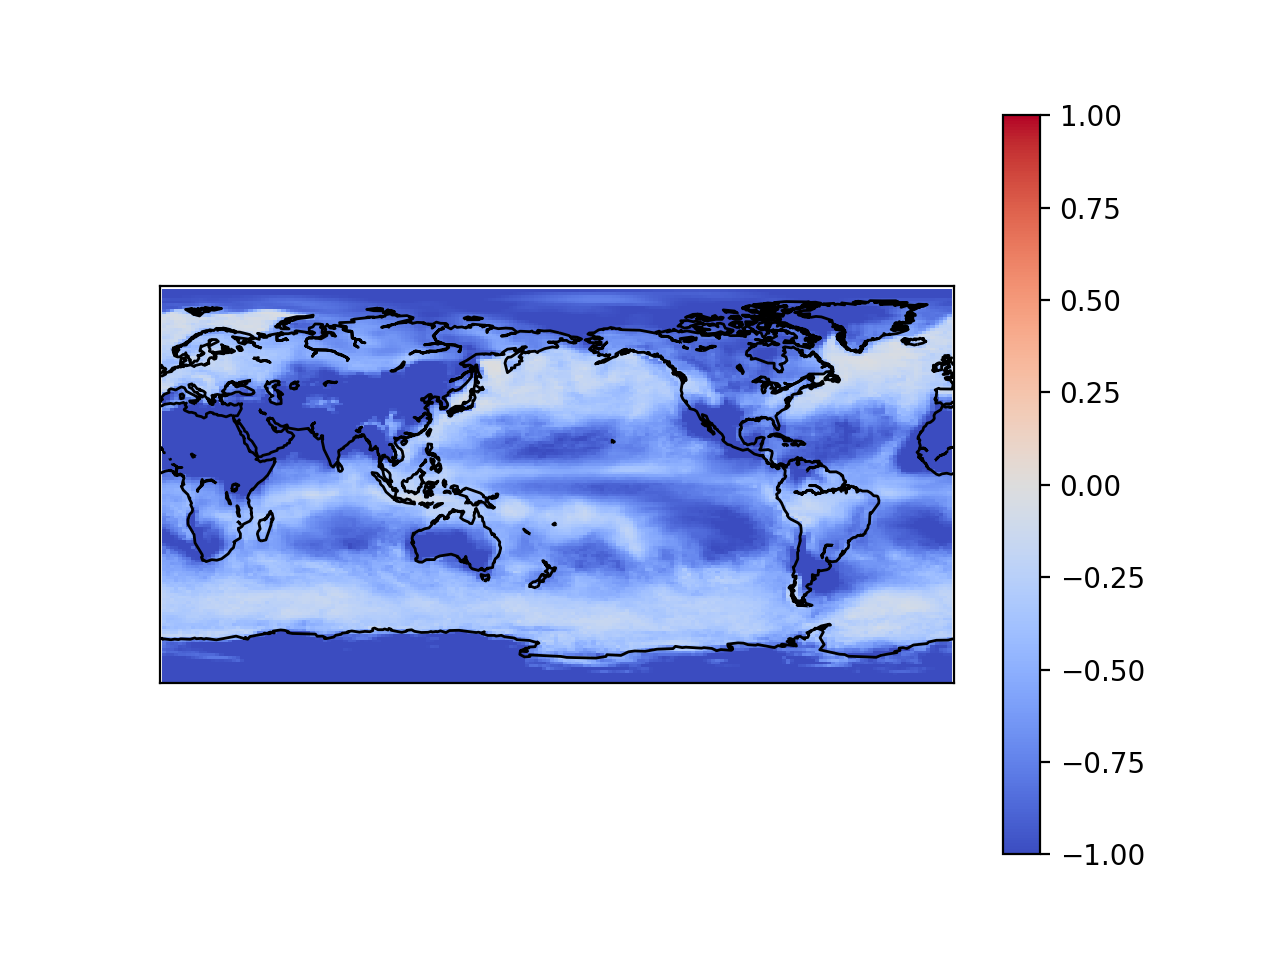

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [161]:
plt.figure()
m=bmap(tsurf_kernel[0],projection='cyl',vmin=-1,vmax=1)
m.drawcoastlines()
plt.colorbar()

In [162]:
tsurf_kernel.units
cdutil.averager(tsurf_kernel,axis='xy')

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


variable_6416
masked_array(data=[-0.6877885779930627, -0.684470907069626,
                   -0.6765110470211132, -0.6833243089790655,
                   -0.6828566402821681, -0.6925446615481661,
                   -0.6870179316807088, -0.6882040094429286,
                   -0.7062917619424423, -0.6924606142169737,
                   -0.6990234568626111, -0.7072056517755382],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20)

In [150]:
f=cdms.open("/Users/kmarvel/Documents/DATA/LGM/IPSL_preindustrial/MonthlyMeans/ts_monthlymean.nc")

In [151]:
tsmm_pi=f("ts")
f.close()

In [142]:
regridded.shape

(12, 143, 144)

In [146]:
tsmm_LGM=cdutil.ANNUALCYCLE.climatology(ts)

In [154]:
dTs_mm=tsmm_LGM-tsmm_pi
cdutil.averager(dTs_mm,axis='xy')

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


variable_6372
masked_array(data=[-1.7780542380818591, -1.6806072297113541,
                   -1.5995317947943164, -1.4339622893091548,
                   -1.2961780639811538, -1.3180909513204864,
                   -1.4592769659459845, -1.6686854584077864,
                   -1.866598401642724, -2.044235441119016,
                   -2.0474102136105747, -1.8848124107748767],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20)

In [172]:
ERF_new=TOA_LGM-TOA_pi-MV.average(dTs_mm*regridded,axis=0)

In [174]:
cdutil.averager(ERF_new,axis='xy')

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


variable_6496
masked_array(data=-4.80264064,
             mask=False,
       fill_value=1e+20)